# Predicting car insurance sales
> A notebook exploring a car insurance quote dataset to build a predicitive model to classify offered quotes as purchased or not purchased.

- toc: true 
- badges: false
- comments: true
- categories: [classification]
- image: images/classification2.png
- author: Aidan Hood

## Summary


## Libraries

In [53]:
#collapse-hide
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings(action='ignore')
pd.set_option("max_columns", 40)

## Data input and exploration

In [54]:
df = pd.read_csv("./insurance_quotes.csv")

df.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
0,48.0,7000.0,41.961971,419.619709,7000.0,366.105677,8.711803,29/05/2020,M,0
1,32.0,8000.0,53.448931,534.489312,6000.0,306.560408,8.754815,03/07/2019,S,0
2,32.0,7000.0,48.042838,480.428376,6000.0,430.070380,6.942515,04/10/2019,M,0
3,32.0,10000.0,38.572157,385.721570,7000.0,493.840343,9.165431,22/09/2020,S,0
4,28.0,9000.0,33.317349,333.173490,5000.0,416.459533,6.810972,08/09/2019,M,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_Age            49506 non-null  float64
 1   Vehicle_Value         49491 non-null  float64
 2   Tax                   49519 non-null  float64
 3   Price                 49504 non-null  float64
 4   Vehicle_Mileage       49464 non-null  float64
 5   Credit_Score          49478 non-null  float64
 6   Licence_Length_Years  49508 non-null  float64
 7   Date                  50000 non-null  object 
 8   Marital_Status        49512 non-null  object 
 9   Sale                  50000 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB


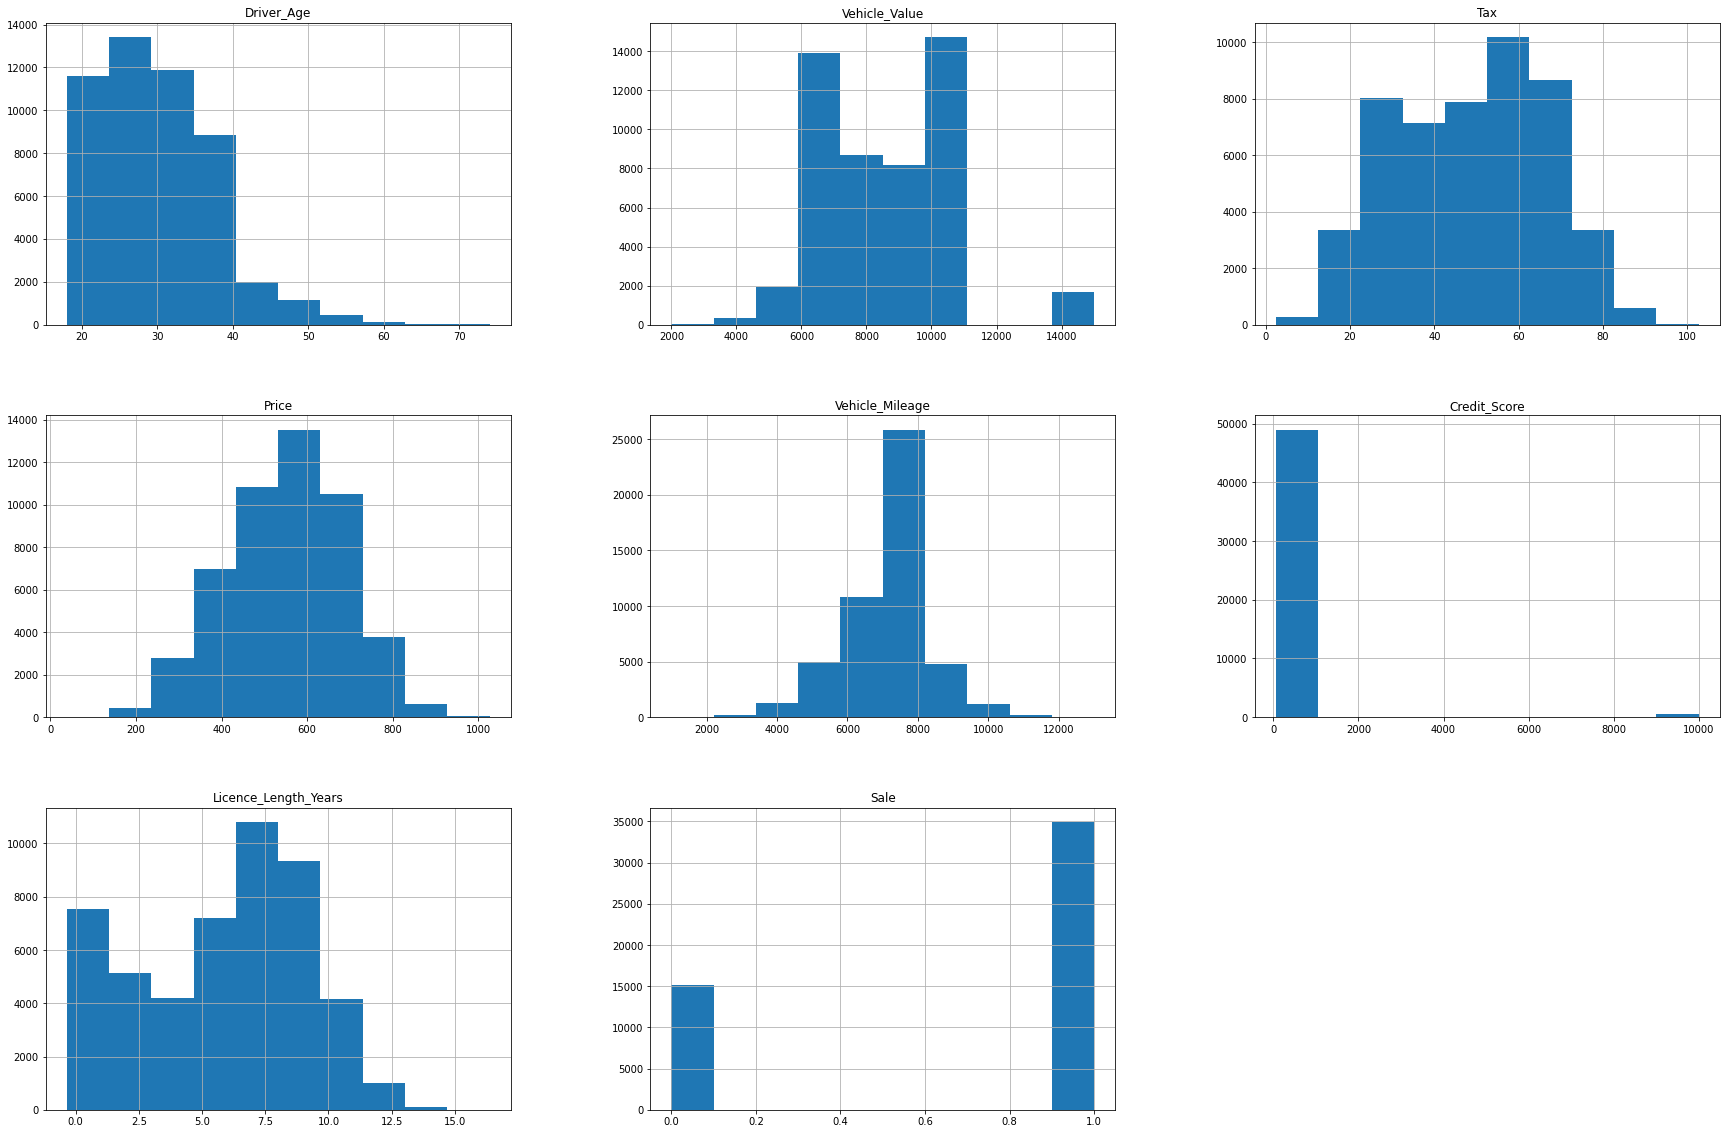

In [56]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

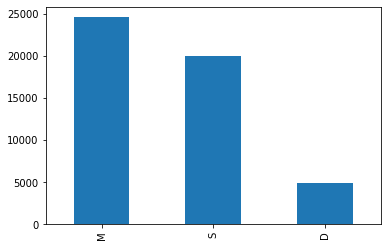

In [57]:
df['Marital_Status'].value_counts().plot(kind='bar')

## Feature Engineering

In [58]:
df['price/value'] = df['Price'] / df ['Vehicle_Value']
df['price/mileage'] = df['Price'] / df ['Vehicle_Mileage']
df['value/mileage'] = df['Vehicle_Value'] / df ['Vehicle_Mileage']
df['price/value/mileage'] = df['Price'] / df ['value/mileage']

df['price/age'] = df['Price'] / df ['Driver_Age']
df['price/value/age'] = df['price/value'] / df ['Driver_Age']
df['price/mileage/age'] = df['price/mileage'] / df ['Driver_Age']
df['value/mileage/age'] = df['value/mileage'] / df ['Driver_Age']
df['price/value/mileage/age'] = df['price/value/mileage'] / df ['Driver_Age']

df['price/credit_score'] = df['Price'] / df ['Credit_Score']
df['price/value/credit_score'] = df['price/value'] / df ['Credit_Score']
df['price/mileage/credit_score'] = df['price/mileage'] / df ['Credit_Score']
df['value/mileage/credit_score'] = df['value/mileage'] / df ['Credit_Score']
df['price/value/mileage/credit_score'] = df['price/value/mileage'] / df ['Credit_Score']

df['price/licence_length'] = df['Price'] / df ['Licence_Length_Years']
df['price/value/licence_length'] = df['price/value'] / df ['Licence_Length_Years']
df['price/mileage/licence_length'] = df['price/mileage'] / df ['Licence_Length_Years']
df['value/mileage/licence_length'] = df['value/mileage'] / df ['Licence_Length_Years']
df['price/value/mileage/licence_length'] = df['price/value/mileage'] / df ['Licence_Length_Years']



df

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,price/value,price/mileage,value/mileage,price/value/mileage,price/age,price/value/age,price/mileage/age,value/mileage/age,price/value/mileage/age,price/credit_score,price/value/credit_score,price/mileage/credit_score,value/mileage/credit_score,price/value/mileage/credit_score,price/licence_length,price/value/licence_length,price/mileage/licence_length,value/mileage/licence_length,price/value/mileage/licence_length
0,48.0,7000.0,41.961971,419.619709,7000.0,366.105677,8.711803,29/05/2020,M,0,0.059946,0.059946,1.000000,419.619709,8.742077,0.001249,0.001249,0.020833,8.742077,1.146171,0.000164,0.000164,0.002731,1.146171,48.166804,0.006881,0.006881,0.114787,48.166804
1,32.0,8000.0,53.448931,534.489312,6000.0,306.560408,8.754815,03/07/2019,S,0,0.066811,0.089082,1.333333,400.866984,16.702791,0.002088,0.002784,0.041667,12.527093,1.743504,0.000218,0.000291,0.004349,1.307628,61.050901,0.007631,0.010175,0.152297,45.788176
2,32.0,7000.0,48.042838,480.428376,6000.0,430.070380,6.942515,04/10/2019,M,0,0.068633,0.080071,1.166667,411.795751,15.013387,0.002145,0.002502,0.036458,12.868617,1.117092,0.000160,0.000186,0.002713,0.957508,69.200909,0.009886,0.011533,0.168047,59.315065
3,32.0,10000.0,38.572157,385.721570,7000.0,493.840343,9.165431,22/09/2020,S,0,0.038572,0.055103,1.428571,270.005099,12.053799,0.001205,0.001722,0.044643,8.437659,0.781065,0.000078,0.000112,0.002893,0.546746,42.084389,0.004208,0.006012,0.155865,29.459072
4,28.0,9000.0,33.317349,333.173490,5000.0,416.459533,6.810972,08/09/2019,M,0,0.037019,0.066635,1.800000,185.096383,11.899053,0.001322,0.002380,0.064286,6.610585,0.800014,0.000089,0.000160,0.004322,0.444452,48.917174,0.005435,0.009783,0.264279,27.176208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,36.0,10000.0,60.110006,601.100056,7000.0,533.801541,8.879116,21/08/2020,M,1,0.060110,0.085871,1.428571,420.770039,16.697224,0.001670,0.002385,0.039683,11.688057,1.126074,0.000113,0.000161,0.002676,0.788252,67.698189,0.006770,0.009671,0.160891,47.388732
49996,25.0,9000.0,72.137461,721.374615,5000.0,479.516773,1.646213,19/10/2019,M,1,0.080153,0.144275,1.800000,400.763675,28.854985,0.003206,0.005771,0.072000,16.030547,1.504378,0.000167,0.000301,0.003754,0.835766,438.202533,0.048689,0.087641,1.093419,243.445852
49997,35.0,4000.0,31.277686,625.553718,NaN,247.608070,9.737412,23/01/2019,D,1,0.156388,NaN,NaN,NaN,17.872963,0.004468,NaN,NaN,NaN,2.526387,0.000632,NaN,NaN,NaN,64.242297,0.016061,NaN,NaN,NaN
49998,34.0,15000.0,66.400205,664.002049,5000.0,345.032627,9.892743,03/10/2020,M,1,0.044267,0.132800,3.000000,221.334016,19.529472,0.001302,0.003906,0.088235,6.509824,1.924462,0.000128,0.000385,0.008695,0.641487,67.120118,0.004475,0.013424,0.303253,22.373373


In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.dayofweek
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day

df = df.drop(['Date'], axis = 1)

df

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Marital_Status,Sale,price/value,price/mileage,value/mileage,price/value/mileage,price/age,price/value/age,price/mileage/age,value/mileage/age,price/value/mileage/age,price/credit_score,price/value/credit_score,price/mileage/credit_score,value/mileage/credit_score,price/value/mileage/credit_score,price/licence_length,price/value/licence_length,price/mileage/licence_length,value/mileage/licence_length,price/value/mileage/licence_length,day_of_week,year,month,day
0,48.0,7000.0,41.961971,419.619709,7000.0,366.105677,8.711803,M,0,0.059946,0.059946,1.000000,419.619709,8.742077,0.001249,0.001249,0.020833,8.742077,1.146171,0.000164,0.000164,0.002731,1.146171,48.166804,0.006881,0.006881,0.114787,48.166804,4,2020,5,29
1,32.0,8000.0,53.448931,534.489312,6000.0,306.560408,8.754815,S,0,0.066811,0.089082,1.333333,400.866984,16.702791,0.002088,0.002784,0.041667,12.527093,1.743504,0.000218,0.000291,0.004349,1.307628,61.050901,0.007631,0.010175,0.152297,45.788176,3,2019,3,7
2,32.0,7000.0,48.042838,480.428376,6000.0,430.070380,6.942515,M,0,0.068633,0.080071,1.166667,411.795751,15.013387,0.002145,0.002502,0.036458,12.868617,1.117092,0.000160,0.000186,0.002713,0.957508,69.200909,0.009886,0.011533,0.168047,59.315065,2,2019,4,10
3,32.0,10000.0,38.572157,385.721570,7000.0,493.840343,9.165431,S,0,0.038572,0.055103,1.428571,270.005099,12.053799,0.001205,0.001722,0.044643,8.437659,0.781065,0.000078,0.000112,0.002893,0.546746,42.084389,0.004208,0.006012,0.155865,29.459072,1,2020,9,22
4,28.0,9000.0,33.317349,333.173490,5000.0,416.459533,6.810972,M,0,0.037019,0.066635,1.800000,185.096383,11.899053,0.001322,0.002380,0.064286,6.610585,0.800014,0.000089,0.000160,0.004322,0.444452,48.917174,0.005435,0.009783,0.264279,27.176208,4,2019,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,36.0,10000.0,60.110006,601.100056,7000.0,533.801541,8.879116,M,1,0.060110,0.085871,1.428571,420.770039,16.697224,0.001670,0.002385,0.039683,11.688057,1.126074,0.000113,0.000161,0.002676,0.788252,67.698189,0.006770,0.009671,0.160891,47.388732,4,2020,8,21
49996,25.0,9000.0,72.137461,721.374615,5000.0,479.516773,1.646213,M,1,0.080153,0.144275,1.800000,400.763675,28.854985,0.003206,0.005771,0.072000,16.030547,1.504378,0.000167,0.000301,0.003754,0.835766,438.202533,0.048689,0.087641,1.093419,243.445852,5,2019,10,19
49997,35.0,4000.0,31.277686,625.553718,NaN,247.608070,9.737412,D,1,0.156388,NaN,NaN,NaN,17.872963,0.004468,NaN,NaN,NaN,2.526387,0.000632,NaN,NaN,NaN,64.242297,0.016061,NaN,NaN,NaN,2,2019,1,23
49998,34.0,15000.0,66.400205,664.002049,5000.0,345.032627,9.892743,M,1,0.044267,0.132800,3.000000,221.334016,19.529472,0.001302,0.003906,0.088235,6.509824,1.924462,0.000128,0.000385,0.008695,0.641487,67.120118,0.004475,0.013424,0.303253,22.373373,1,2020,3,10


## Preparing Test and Train Sets

In [60]:
x = df.drop(['Sale'], axis=1)
y = df['Sale']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Dealing With Categorical Variables

In [61]:
x_train['Marital_Status'] = x_train['Marital_Status'].map({'S': 0, 'D': 1, 'M': 2})
x_test['Marital_Status'] = x_test['Marital_Status'].map({'S': 0, 'D': 1, 'M': 2})

## Dealing with null values

In [62]:
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())


## Normalization

In [63]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 1.89137176,  3.32905041,  0.39031196, ...,  1.00747796,
         0.44369683,  1.70282906],
       [ 0.95699783,  0.78636822, -0.85839888, ...,  1.00747796,
        -0.70728637,  1.58994473],
       [ 0.02262389,  0.78636822, -0.08725668, ...,  1.00747796,
         1.59468003, -1.00639483],
       ...,
       [ 0.28958787,  0.27783179,  1.55627372, ..., -0.99257755,
         0.15595103, -0.44197319],
       [-0.0200542 , -0.23070465, -1.5577058 , ..., -0.99257755,
        -0.41954057, -1.34504782],
       [ 0.82351584, -0.23070465,  1.51027946, ...,  1.00747796,
        -1.28277797, -1.45793215]])

## Dealing With Class Imbalance

In [64]:
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

## Model Selection

In [65]:
# collapse-hide
log_regression = linear_model.LogisticRegression()
n_bayes = naive_bayes.GaussianNB()
knn = neighbors.KNeighborsClassifier()
rand_forest = ensemble.RandomForestClassifier(n_jobs=-1)

models = [log_regression, n_bayes, knn, rand_forest]
model_names = ['Logistic Regression', 'Naive Bayes','K-Nearest-Neighbours', 'Random Forest']

print('F1:')
for i in range(len(models)):
    kfold = KFold(n_splits=7)
    result = cross_val_score(models[i], x_train, y_train, cv=kfold, scoring='f1')
    print(model_names[i] + ': ' + str(result.mean()) )

print('\nAccuracy:')
for i in range(len(models)):
    kfold = KFold(n_splits=7)
    result = cross_val_score(models[i], x_train, y_train, cv=kfold, scoring='accuracy')
    print(model_names[i] + ': ' + str(result.mean()) )

print('\nBalanced Accuracy:')
for i in range(len(models)):
    kfold = KFold(n_splits=7)
    result = cross_val_score(models[i], x_train, y_train, cv=kfold, scoring='balanced_accuracy')
    print(model_names[i] + ': ' + str(result.mean()) )


F1:
Logistic Regression: 0.5034635634003579
Naive Bayes: 0.44266159191982074
K-Nearest-Neighbours: 0.493778967815985
Random Forest: 0.5118872750439681

Accuracy:
Logistic Regression: 0.8144387462426425
Naive Bayes: 0.7800164836969884
K-Nearest-Neighbours: 0.7832981328946025
Random Forest: 0.8358352660381811

Balanced Accuracy:
Logistic Regression: 0.8144392140386482
Naive Bayes: 0.7800199240636873
K-Nearest-Neighbours: 0.7832983112959443
Random Forest: 0.8368722766444475


## Hyperparameter Tuning

In [66]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
            }

grid = GridSearchCV(rand_forest, param_grid = parameters, scoring='balanced_accuracy', verbose=1)
grid.fit(x_train, y_train)
print(grid.best_params_)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'entropy', 'max_features': 'sqrt'}


## Model Implementation

In [67]:
#collapse-hide
rand_forest = ensemble.RandomForestClassifier(criterion = 'entropy', max_features='sqrt', n_jobs=-1)
rand_forest.fit(x_train,y_train)

predictions = rand_forest.predict(x_test)
accuracy = metrics.balanced_accuracy_score(y_test,predictions)
f1 = metrics.f1_score(y_test,predictions)
print('Balanced Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

Balanced Accuracy: 0.8711021239291112
F1 Score: 0.9031294346105011


## Model Evaluation

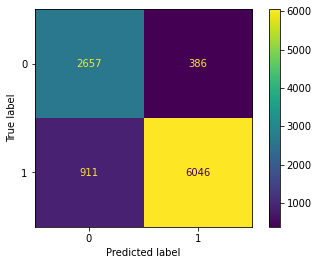

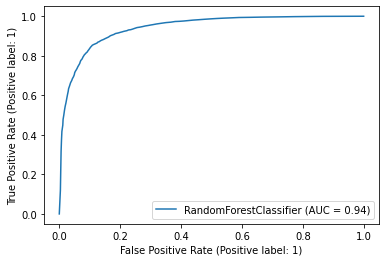

In [68]:
#collapse-hide
c_matrix = metrics.plot_confusion_matrix(rand_forest, x_test,y_test)
metrics.plot_roc_curve(rand_forest, x_test,y_test)
plt.show()

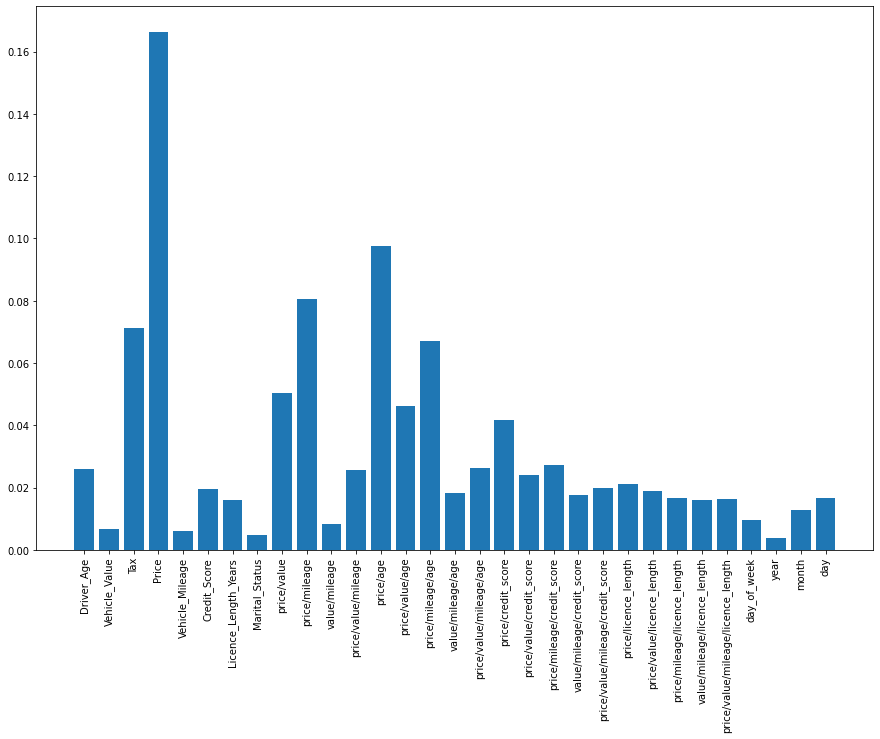

In [69]:
#collapse-hide
feature_importances = rand_forest.feature_importances_
feature_strings = x_train.columns.tolist()
fig = plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.bar(feature_strings, feature_importances)
plt.show()